In [8]:
from fuzzywuzzy import fuzz
import pandas as pd
from fuzzywuzzy import process

C:\Users\felip\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Lidando com strings confusas

<p><center>Salvador = Salvadr = S@alvad#r </center></p>

<p> Sempre que lidarmos com strings diferentes das quais representam a mesma informação, porém com determinados problemas de escrita, podemos utilizar a library fuzzywuzzy para consertar isso.</p>

## Criando Dados Para Testes

In [48]:
dicio = {'cidades':['Santos','$$#%Salvdor$#@','$$#%dorsalva$#@',\
                    'Salvador','Snts','santos',\
                    'sants','salvador','ssa','salvdor']}
df = pd.DataFrame(dicio)
df

,cidades
0,Santos
1,$$#%Salvdor$#@
2,$$#%dorsalva$#@
3,Salvador
4,Snts
5,santos
6,sants
7,salvador
8,ssa
9,salvdor


# Funções(fuzz) - ratio( ) - partial_ratio( ) - partial_token_sort_ratio( )
<p> Dentro da classe fuzz temos diversos métodos com funcionalidades diferentes, sendo as principais <b>ratio</b> | <b>partial_ratio</b> | <b>partial_token_sort_ratio</b>.</p>

```python
fuzz.********(palavra1,palavra2)
```

* Necessidade: Ter as palavras corretas em um array assim como nossa string a ser analisada.

In [15]:
palavras_corretas = ['Santos','Salvador']
df

,cidades
0,Santos
1,$$#%Salvdor$#@
2,$$#%dorsalva$#@
3,Salvador
4,Snts
5,santos
6,sants
7,salvador
8,ssa
9,salvdor


### Ratio()
<p> Com <b>Ratio</b> podemos fazer uma checagem simples, identificando de 0 a 100 qual a similaridade entre duas palavras utilizando o metódo de levensthein. </p>

Checando a diferença entre a palavra 'Santos' do dataframe e 'Santos' da lista de palavras corretas, 100% igual.


In [16]:
fuzz.ratio(df.loc[0,'cidades'], palavras_corretas[0])

100

Checando a diferença entre a palavra 'Santos' do dataframe e 'Salvador' da lista de palavras corretas, 43% igual.


In [17]:
fuzz.ratio(df.loc[0,'cidades'], palavras_corretas[1])

43

## Partial_ratio()
<p> Com <b>partial_ratio</b> poderemos fazer uma busca parcial na string, buscando exatamente a palavra que queremos (ideal para consultas de dados na WEB).</p>

In [20]:
df.loc[1,'cidades']

'$$#%Salvdor$#@'

Comparando a cidade acima com ratio normal.

In [23]:
# Vemos que a semelhança entre "Salvador" e "$$#%Salvdor$#@" com ratio é de 64 
fuzz.ratio(df.loc[1,'cidades'],palavras_corretas[1]) 

64

Utilizando agora o partial_ratio para a comparação.

In [22]:
# Vemos que com o método partial_ratio o resultado é de 88
fuzz.partial_ratio(df.loc[1,'cidades'],palavras_corretas[1]) 

88

## partial_token_sort_ratio( )
<p>Com <b>partial_token_sort_ratio</b>, poderemos diferente do partial_ratio, não apenas analisar a string em si, como separa-la por ordem alfabetica antes de analisar, e efetuar uma verificação parcial em cima dessa ordem. </p>

In [24]:
df.loc[2,'cidades']

'$$#%dorsalva$#@'

Utilizando um ratio simples para palavra.

In [25]:
fuzz.ratio(df.loc[2,'cidades'],palavras_corretas[1])

35

Utilizando um partial ratio para focar parcialmente na palavra buscada.


In [26]:
fuzz.partial_ratio(df.loc[2,'cidades'],palavras_corretas[1])

50

Utilizando o token sort para organizar a palavra alfabeticamente e ver sua semelhança.

In [27]:
fuzz.partial_token_sort_ratio(df.loc[2,'cidades'],palavras_corretas[1])

62

# Funções(process) - extract( )

<p> Para aplicar a função em dataframes podemos utilizar a classe process. </p>

```python
process.extract( 'nome_correto', lista_a_ser_testada, scorer = função_fuzzy_a_ser_usada, 
                score_cutoff = valor_que_cortaremos, limit = numero_de_resultados )
```

## EXEMPLO: Verificando as cidades Santos

<p> Comparando as palavras da coluna 'cidades', com a palavra 'Santos'. </p>

In [40]:
process.extract(palavras_corretas[0],df['cidades'],scorer = fuzz.partial_token_sort_ratio, limit =10)

[('Santos', 100, 0),
 ('santos', 100, 5),
 ('sants', 80, 6),
 ('Snts', 75, 4),
 ('ssa', 67, 8),
 ('$$#%Salvdor$#@', 50, 1),
 ('salvdor', 50, 9),
 ('$$#%dorsalva$#@', 36, 2),
 ('Salvador', 33, 3),
 ('salvador', 33, 7)]

# MODIFICANDO UM DATAFRAME COM AS FUNÇÕES
<p> Usando um for para fazer a alteração das palavras, com base em uma lista de palavras corretas. </p>

In [49]:
print(palavras_corretas)
df['cidades']

['Santos', 'Salvador']


0             Santos
1     $$#%Salvdor$#@
2    $$#%dorsalva$#@
3           Salvador
4               Snts
5             santos
6              sants
7           salvador
8                ssa
9            salvdor
Name: cidades, dtype: object

* Rodamos a lista de palavras corretas;
* Comparamos cada palavra em relação a coluna;
* Selecionamos só os valores onde o valor for maior que 80;
* Criando uma nova coluna e acrescentando o valor correto da string;

In [50]:
for palavra in palavras_corretas:
    cidades = process.extract(palavra, df['cidades'], scorer = fuzz.partial_token_sort_ratio)
    for x in cidades:
        if x[1] >= 80:
            df.loc[df['cidades']==x[0],'Cidades_Novas'] = palavra
df

,cidades,Cidades_Novas
0,Santos,Santos
1,$$#%Salvdor$#@,Salvador
2,$$#%dorsalva$#@,NaN
3,Salvador,Salvador
4,Snts,NaN
5,santos,Santos
6,sants,Santos
7,salvador,Salvador
8,ssa,NaN
9,salvdor,Salvador


* Rodando o mesmo código sem exigencia de valor minimo de similaridade

In [51]:
for z in palavras_corretas:
    lista = process.extract(z, df['cidades'])
    for k in lista:
        df.loc[df['cidades'] == k[0],'outras'] = z
df

,cidades,Cidades_Novas,outras
0,Santos,Santos,Santos
1,$$#%Salvdor$#@,Salvador,Salvador
2,$$#%dorsalva$#@,NaN,Salvador
3,Salvador,Salvador,Salvador
4,Snts,NaN,Santos
5,santos,Santos,Santos
6,sants,Santos,Santos
7,salvador,Salvador,Salvador
8,ssa,NaN,Santos
9,salvdor,Salvador,Salvador


<AxesSubplot:xlabel='cidades', ylabel='count'>

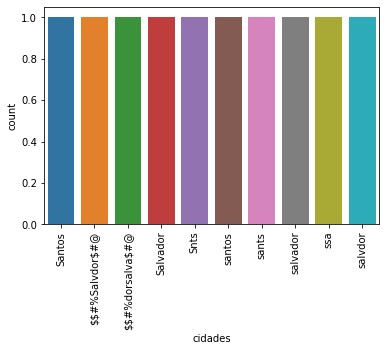

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
sns.countplot(x=df['cidades'])

<AxesSubplot:xlabel='Cidades_Novas', ylabel='count'>

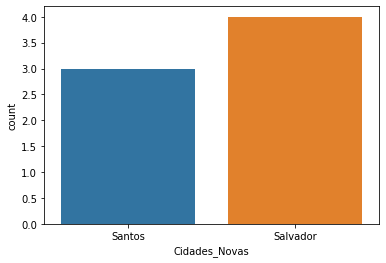

In [55]:
sns.countplot(x=df['Cidades_Novas'])